<a href="https://colab.research.google.com/github/ghulam2545/deep_learning/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import layers

print(tf.__version__)
print('GPU is available' if tf.config.list_physical_devices('GPU') else 'GPU is not available')


2.12.0
GPU is available


In [132]:
(train_ds, validate_ds, test_ds), ds_info = tfds.load(
    'fashion_mnist',
    split=['train[:70%]', 'train[70%:90%]', 'train[90%:]'],
    with_info=True,
    shuffle_files=True,
    as_supervised=True
)

In [109]:
len(train_ds), len(validate_ds), len(test_ds)

(42000, 12000, 6000)

In [110]:
num_classes = ds_info.features['label'].num_classes

num_classes

10

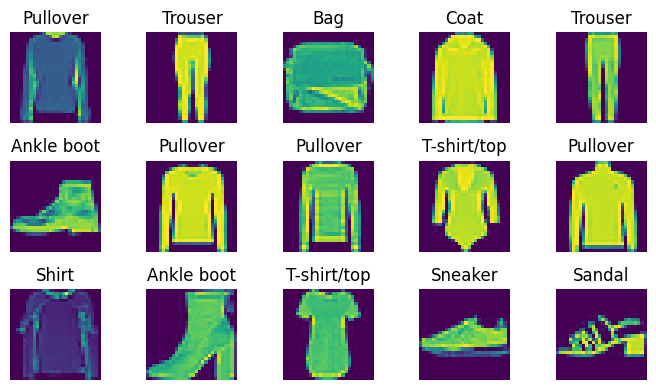

In [134]:
get_label_name = ds_info.features['label'].int2str
train_iter = iter(train_ds)

plt.figure(figsize=(7, 4))
for i in range(15):
  image, label = next(train_iter)
  plt.subplot(3, 5, i+1)
  plt.imshow(image)
  plt.title(get_label_name(label))
  plt.axis('off')
plt.tight_layout()
plt.show()  

In [136]:
batch_size = 64
train_ds = train_ds.batch(batch_size)
validate_ds = validate_ds.batch(batch_size)
test_ds = test_ds.batch(batch_size)

In [137]:
for image, label in train_ds:
  print(image.shape)
  break

(64, 28, 28, 1)


In [138]:
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [139]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_31 (Flatten)        (None, 784)               0         
                                                                 
 dense_78 (Dense)            (None, 512)               401920    
                                                                 
 dense_79 (Dense)            (None, 128)               65664     
                                                                 
 dense_80 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [140]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [141]:
model.fit(train_ds, epochs=5)

Epoch 1/5
657/657 [==============================] - 6s 7ms/step - loss: 5.1174 - accuracy: 0.7564
Epoch 2/5
657/657 [==============================] - 2s 3ms/step - loss: 0.7571 - accuracy: 0.8128
Epoch 3/5
657/657 [==============================] - 3s 4ms/step - loss: 0.4950 - accuracy: 0.8409
Epoch 4/5
657/657 [==============================] - 2s 3ms/step - loss: 0.4429 - accuracy: 0.8500
Epoch 5/5
657/657 [==============================] - 2s 3ms/step - loss: 0.4301 - accuracy: 0.8523


In [142]:
model.evaluate(validate_ds)

188/188 [==============================] - 2s 10ms/step - loss: 0.4522 - accuracy: 0.8503


[0.4522448778152466, 0.8503333330154419]

In [148]:
sample_images = test_ds.take(1)

In [152]:
pred = model.predict(sample_images)
for e in pred[:15]:
  print(np.argmax(e), end=' ')

1/1 [==============================] - 0s 71ms/step
5 0 5 8 9 6 3 8 6 0 9 4 3 7 5 

In [153]:
# not verified